(1, 2)
(1, 2)
(1, 3)
(1, 3)
(1, 4)
(1, 4)
(1, 5)
(1, 5)
(1, 6)
(1, 6)
(1, 7)
(1, 7)
(1, 8)
(1, 8)
(1, 9)
(1, 9)
(1, 10)
(1, 10)
(1, 11)
(1, 11)
(1, 12)
(1, 12)
(1, 13)
(1, 13)
(1, 14)
(1, 14)
(1, 15)
(1, 15)
(1, 16)
(1, 16)
(1, 17)
(1, 17)
(1, 18)
(1, 18)
(1, 19)
(1, 19)
(1, 20)
(1, 20)
(1, 21)
(1, 21)
(1, 22)
(1, 22)
(1, 23)
(1, 23)
(1, 24)
(1, 24)
(1, 25)
(1, 25)
(1, 26)
(1, 26)
(1, 27)
(1, 27)
(1, 28)
(1, 28)
(1, 29)
(1, 29)
(1, 30)
(1, 30)
[ 0.03530312  0.04332765  0.05008693  0.05609557  0.06168671  0.06617056
  0.07136187  0.07518727  0.08012751  0.082732    0.08838178  0.0896581
  0.09414358  0.09990401  0.0986132   0.10150949  0.10316682  0.10834151
  0.11332679  0.11615381  0.10209149  0.10709339  0.09684125  0.08606539
  0.1792127   0.31618912  0.49260387  0.28671247  0.28689142]
2


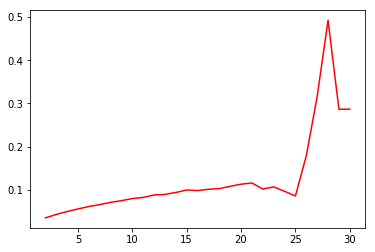

In [40]:
import numpy as np 
import matplotlib 
import matplotlib.pyplot as plt 
%matplotlib inline
import math 
import codecs 
import textwrap 
import numpy as np

start = 2
n = 0.01

testnoisy = np.loadtxt('testnoisy.txt') 
training = np.loadtxt('training.txt') 
validate = np.loadtxt('validate.txt') 

order_upper = 30
delay = 0.001
Error_order = np.zeros(order_upper+1-start)

for order in range(order_upper+1-start):
    
    
    #print(order+2)
    W = np.matrix(np.zeros(order+start))
    print(W.shape)
    Err = 0
    training_length = math.trunc(3000/(order+start))
    validate_length = math.trunc(1000/(order+start))
    test_length = math.trunc(1000/(order+start))
    
    x_h = math.trunc(3000/(order+start))*(order+start)
    x_v_h = math.trunc(1000/(order+start))*(order+start)
    
    x = np.arange(0.001,((x_h)/1000+0.001),0.001)
    x_v = np.arange(0.001,((x_v_h)/1000+0.001),0.001)
    #print(x_v.size)
    
    X_train = x.reshape(training_length,(order+start))
    X_validate = x_v.reshape(validate_length,(order+start))
    #print(X_train.shape)
    
    y = training[0:x_h]
            
    y_v = validate[0:x_v_h]
    
    Y_train_y = np.zeros(training_length)
    Y_validate_y = np.zeros(validate_length)
    
        
    Y_train_x = y.reshape(training_length,(order+start))
    Y_validate_x = y_v.reshape(validate_length,(order+start))
    #print(Y_train_x)
    
    for i in range(training_length): 
        Y_train_y[i] = Y_train_x[i,(order+start-1)]
    Y_train = np.matrix(Y_train_y)  
    
    for i in range(validate_length): 
        Y_validate_y[i] = Y_validate_x[i,(order+start-1)]
    Y_validate = np.matrix(Y_validate_y)  
    
    
    #print(Y_train.shape)
    
    #print(Y_train)
    z = X_train.T@X_train
    #print(X_train.T)
    #print(z)
    #print(Y_train.shape)
    #print(X_validate.shape)
    
    for i in range(training_length):
        X_t = np.matrix(X_train[i,:])
        D = np.array(Y_train_y[i]-W@X_t.T)
        e = float(D[0])
        W = W + n*e*X_t
    print(W.shape)
    #print(X_validate.shape)
    Y_pre = W@X_validate.T
    Y_predict = Y_pre.T
    Y_vali = Y_validate.T
    #print(Y_predict.shape)
    #print(Y_validate.shape)
    for i in range(validate_length):
        Err = Err + (Y_predict[i]-Y_vali[i])**2
    Error_order[order] = math.sqrt(Err)/validate_length
#print(order+2)
#print(Error_order)
#print(Error_order.shape)
print(Error_order)
E = list(Error_order)
print(E.index(min(E))+start)
x_axis = np.arange(start,order_upper-start+3,1)
fig = plt.figure()
p1 = plt.plot(x_axis, Error_order, 'r') #plot true value
    #print(X_validate.shape)

